In [21]:
# Step 1: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [22]:
# Step 2: Load the CSV file into a Pandas DataFrame
file_path = 'Post-Secondary_Financial_Aid_Demographics_in_Colorado_20241017.csv'
df = pd.read_csv(file_path)

In [23]:
# Step 3: Select the relevant columns for analysis
df_filtered = df[['year', 'institutionName', 'sumStateAid', 'sumFederalPell', 'sumFederalLoans', 
                  'sumOtherFederal', 'sumFederalPLUS', 'sumOtherLoans', 'sumOtherScholarships']]

In [24]:
# Step 4: Ensure the 'year' column is numeric
df_filtered.loc[:, 'year'] = pd.to_numeric(df_filtered['year'], errors='coerce')

# Convert all financial columns to numeric, setting errors='coerce' to handle any non-numeric values
columns_to_convert = ['sumStateAid', 'sumFederalPell', 'sumFederalLoans', 'sumOtherFederal', 
                      'sumFederalPLUS', 'sumOtherLoans', 'sumOtherScholarships']

df_filtered.loc[:, columns_to_convert] = df_filtered[columns_to_convert].apply(pd.to_numeric, errors='coerce')

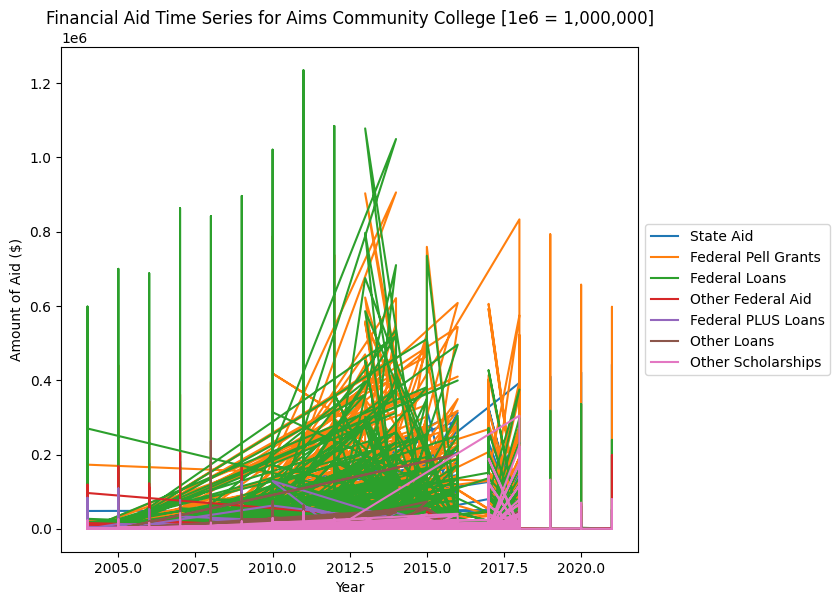

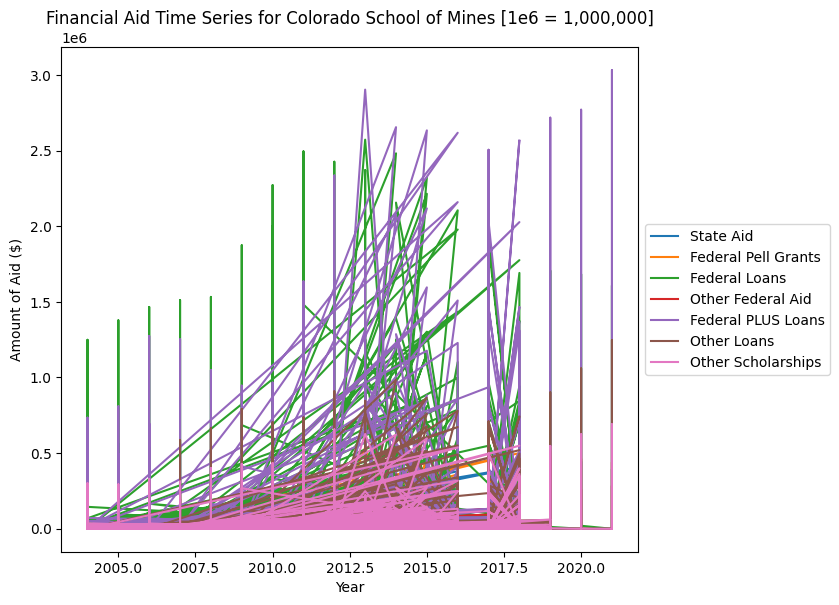

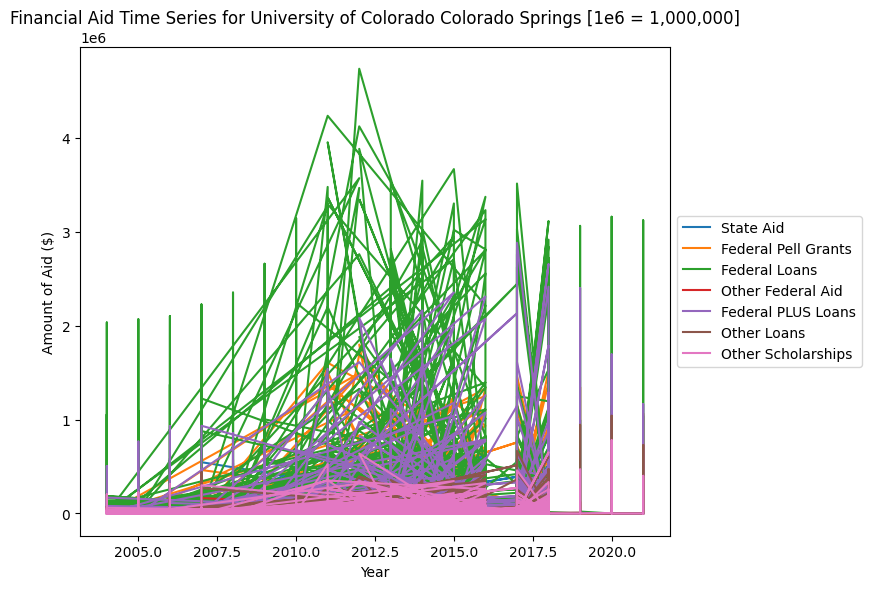

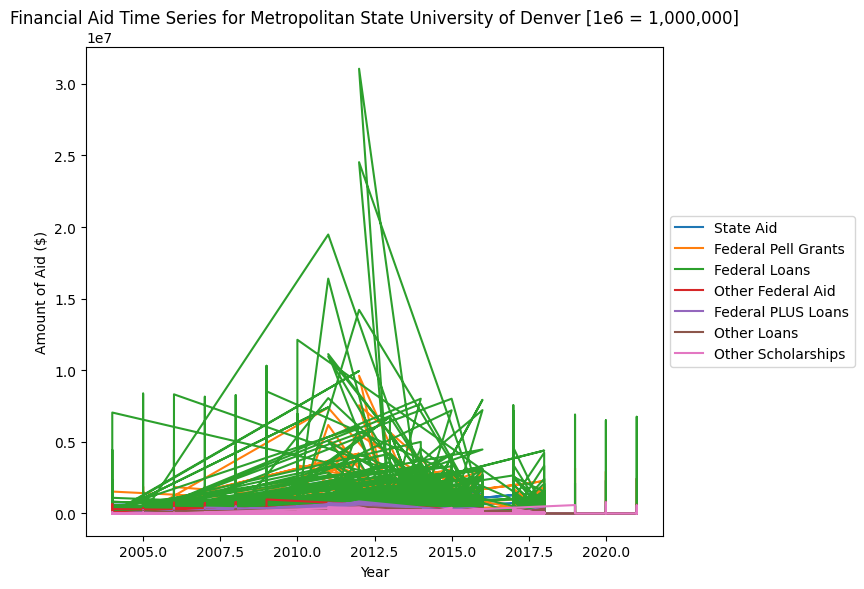

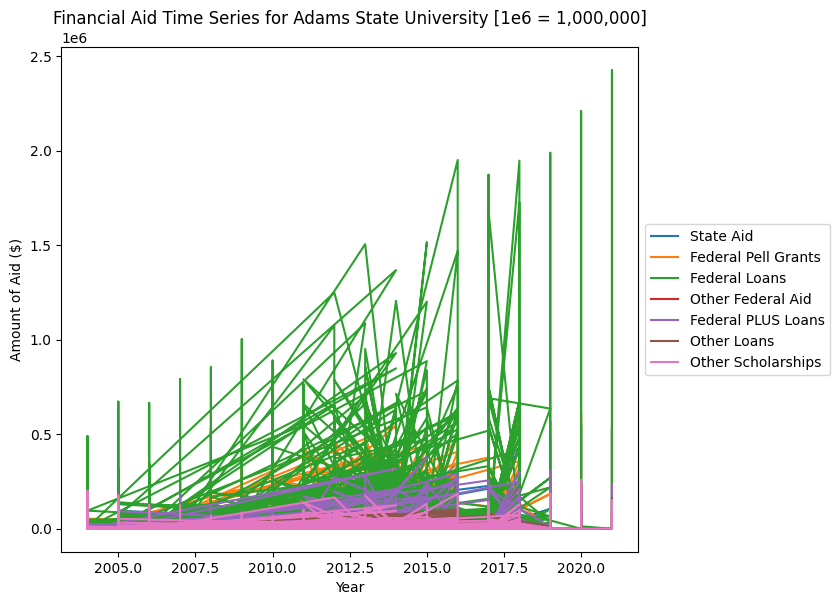

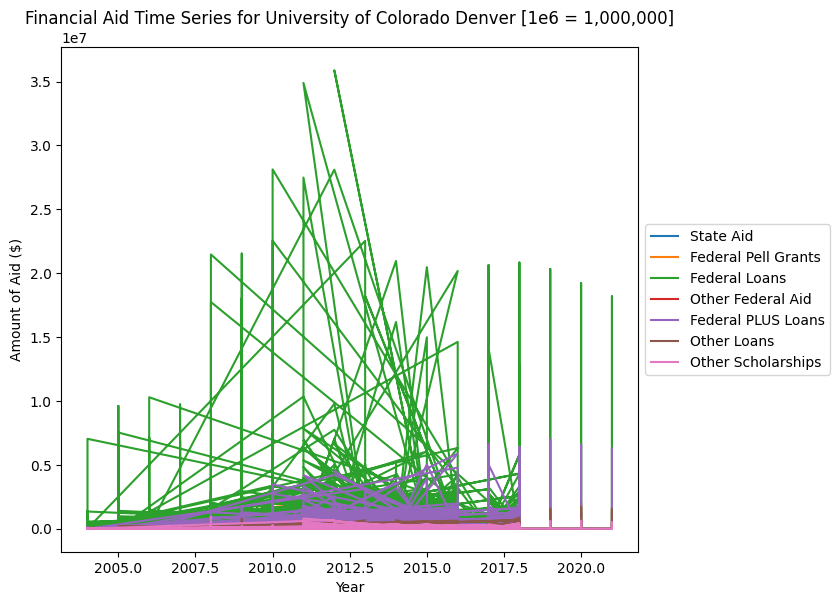

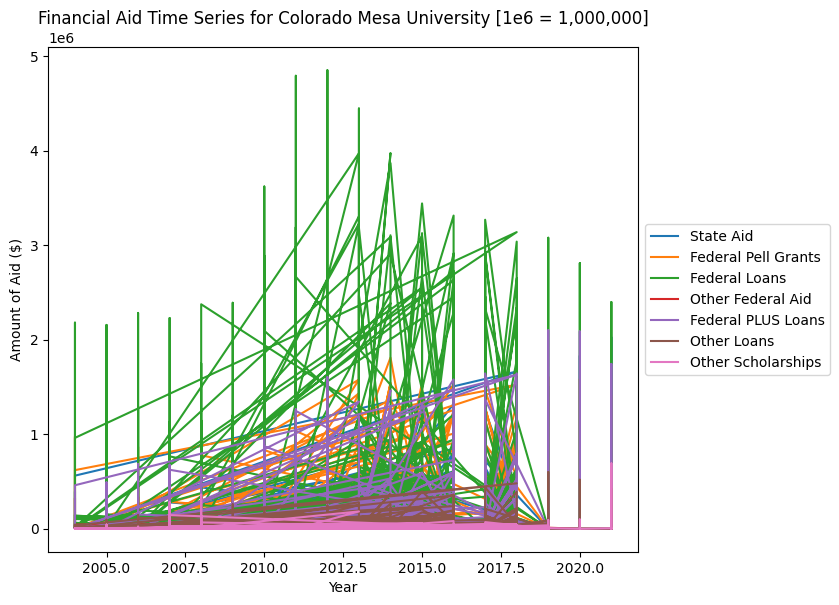

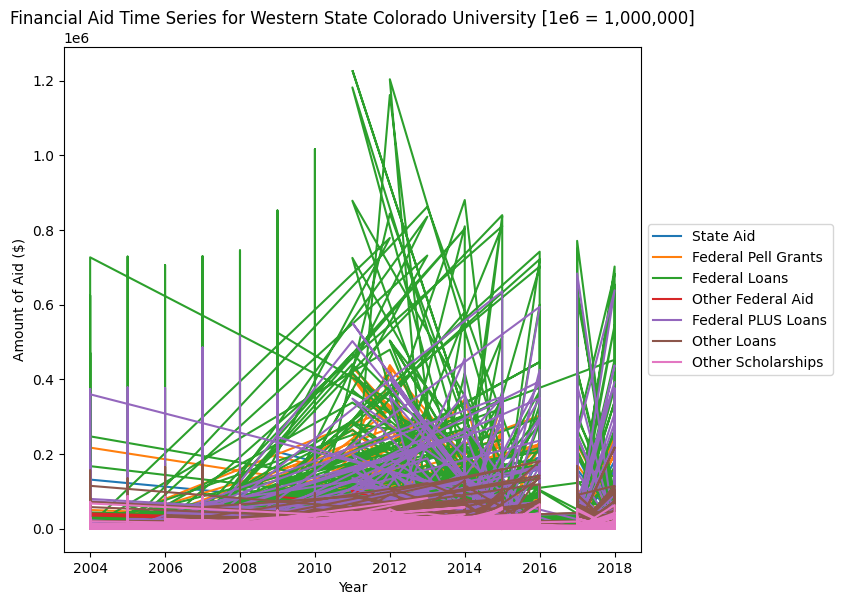

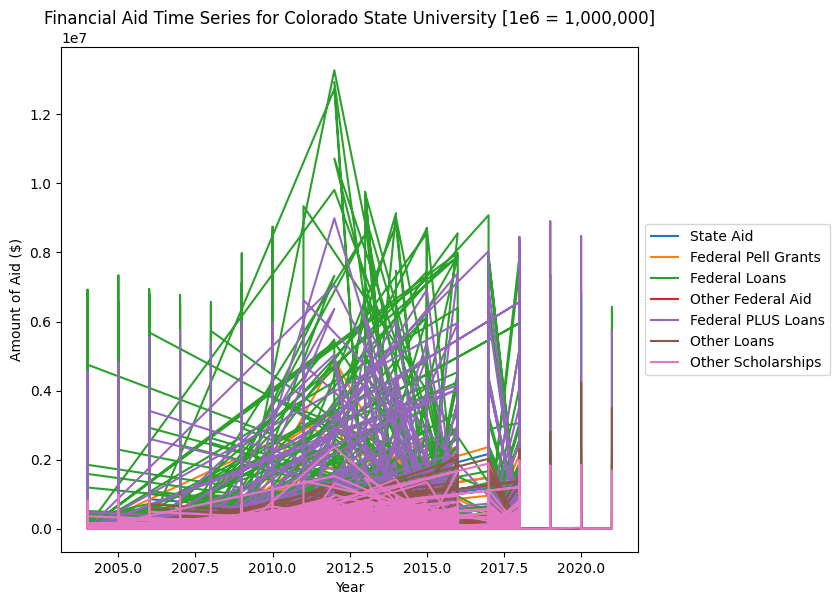

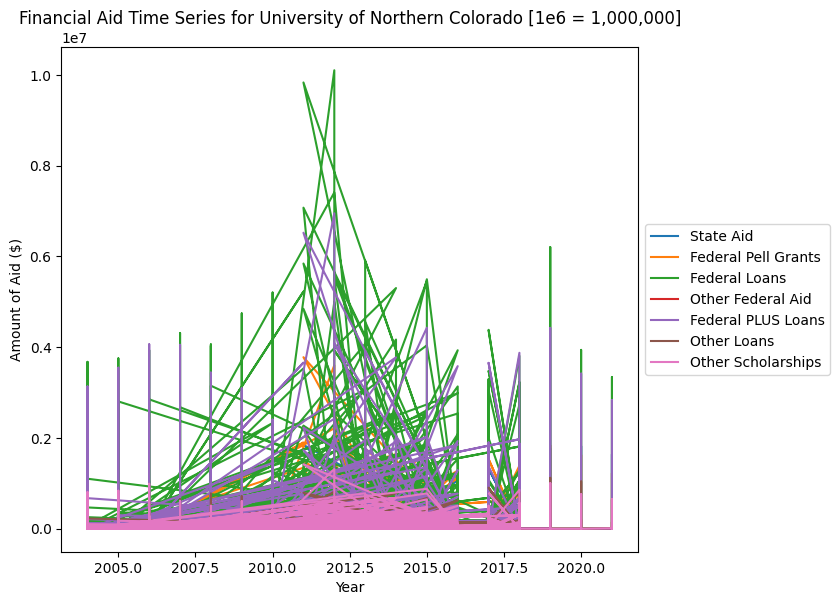

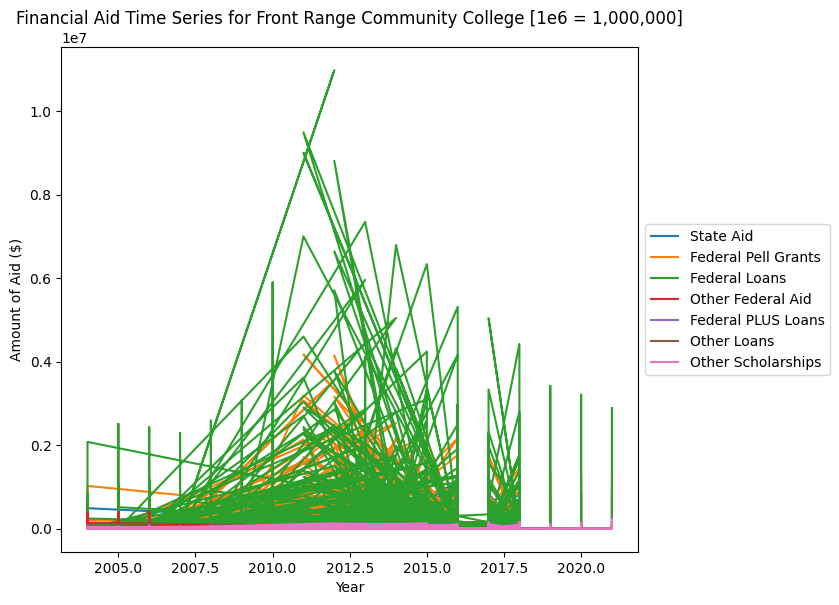

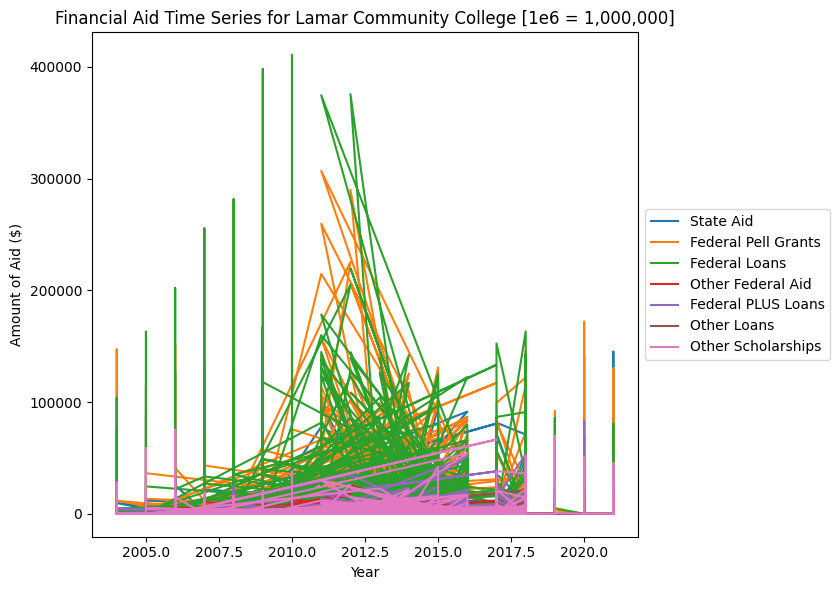

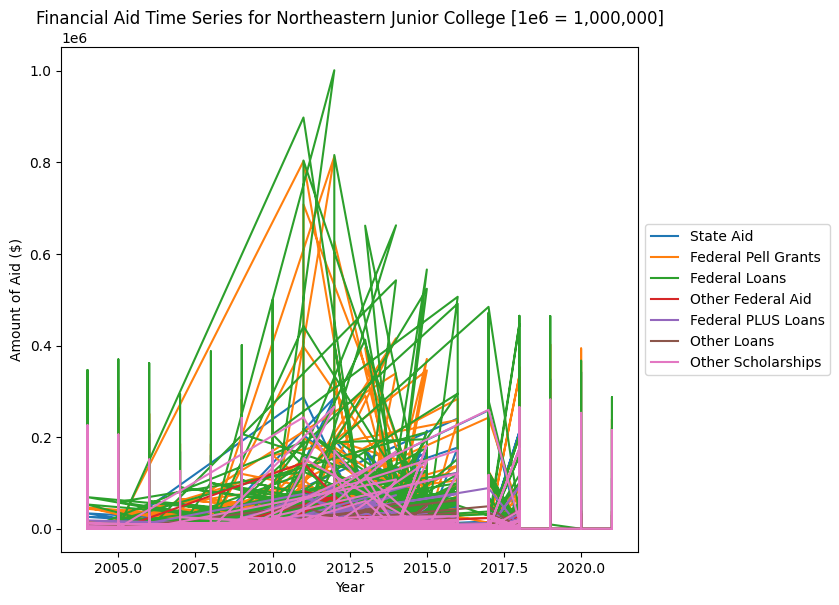

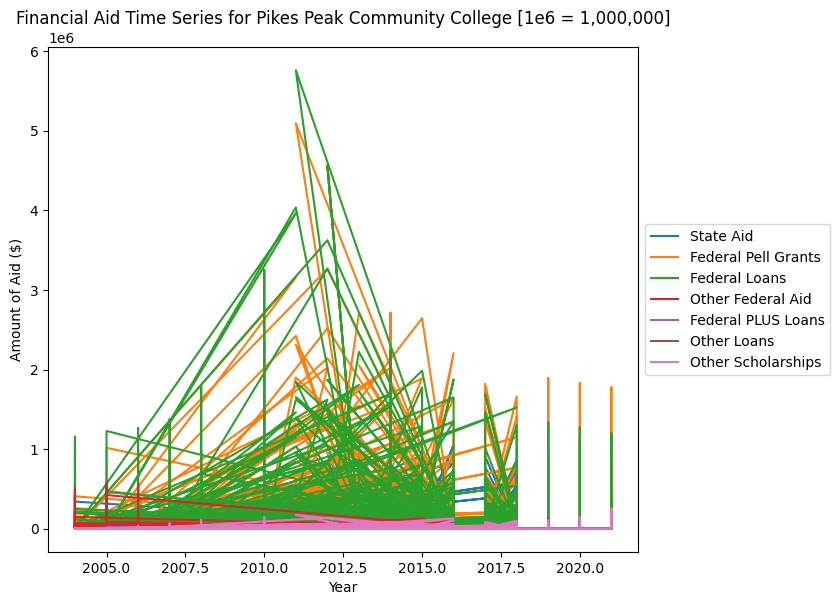

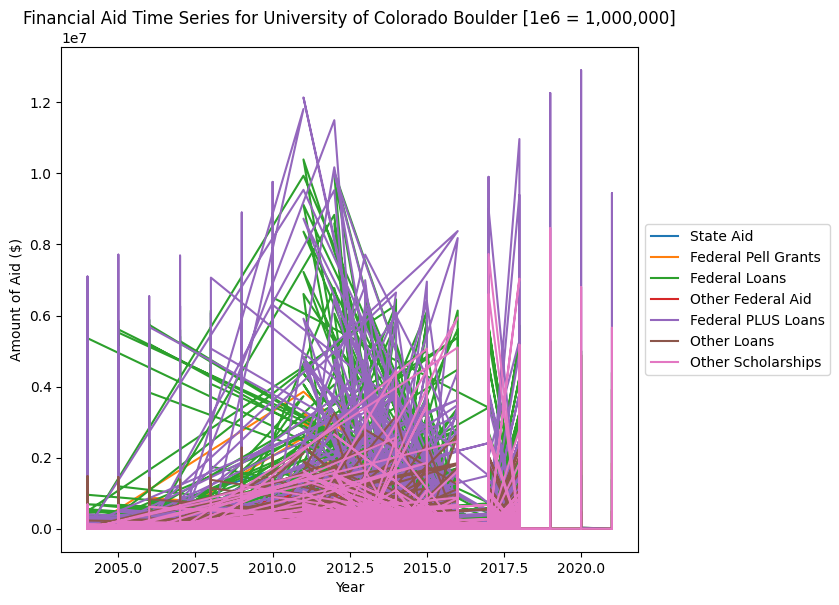

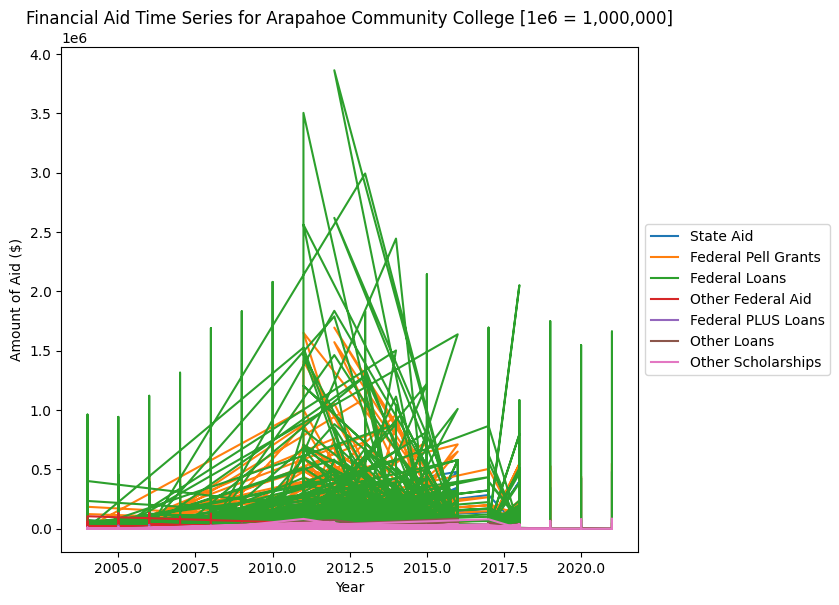

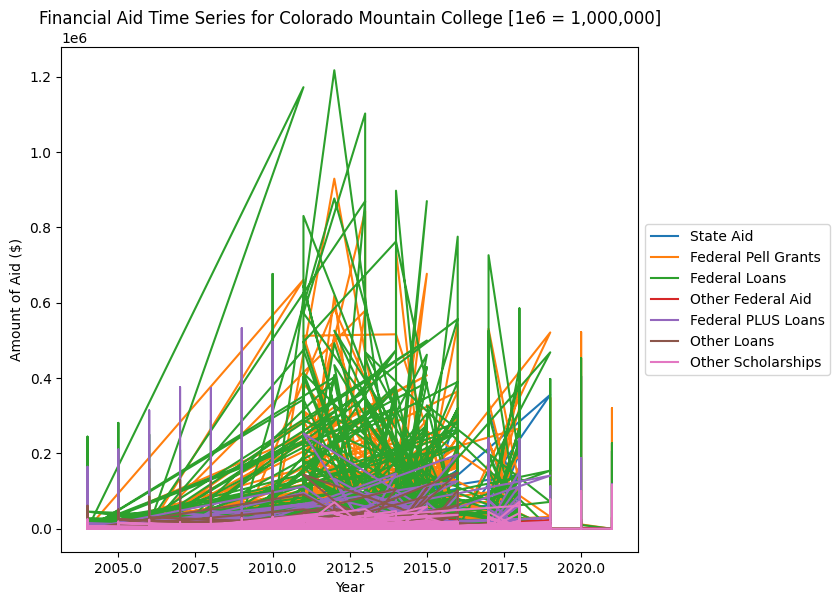

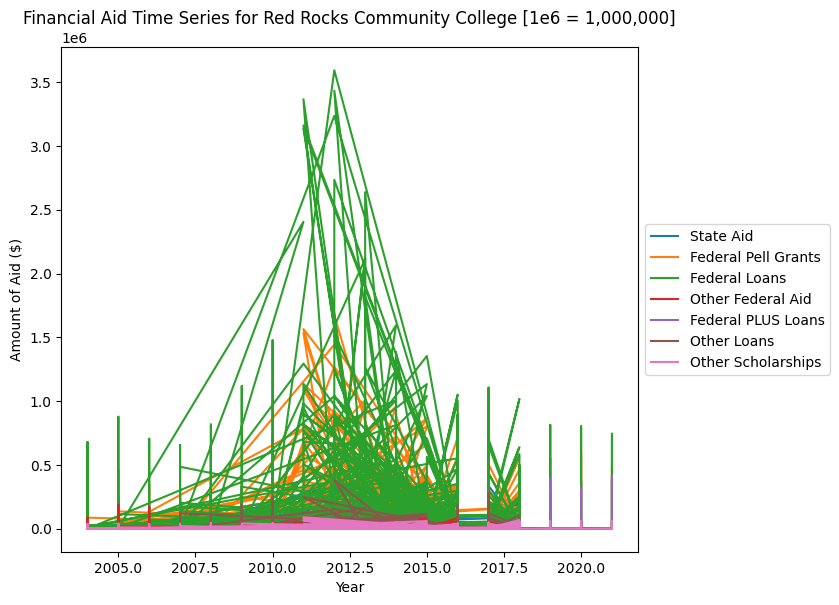

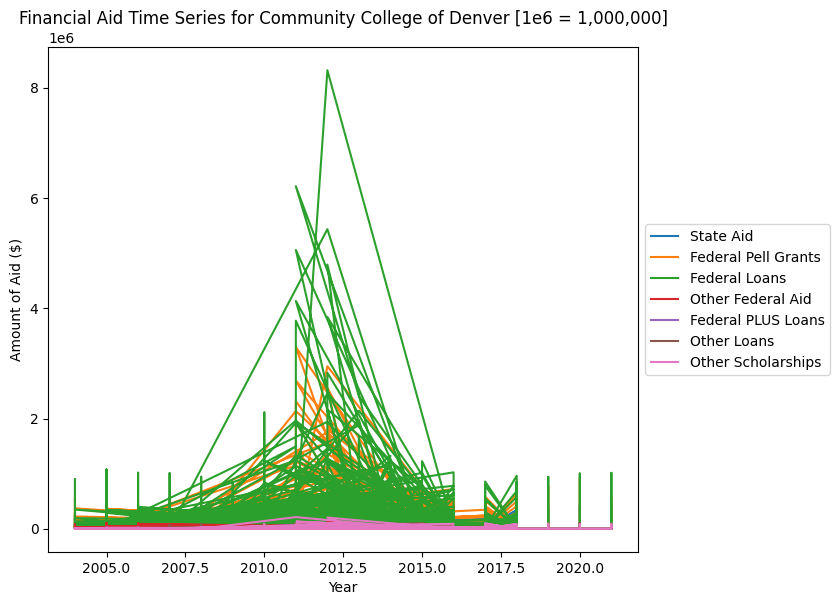

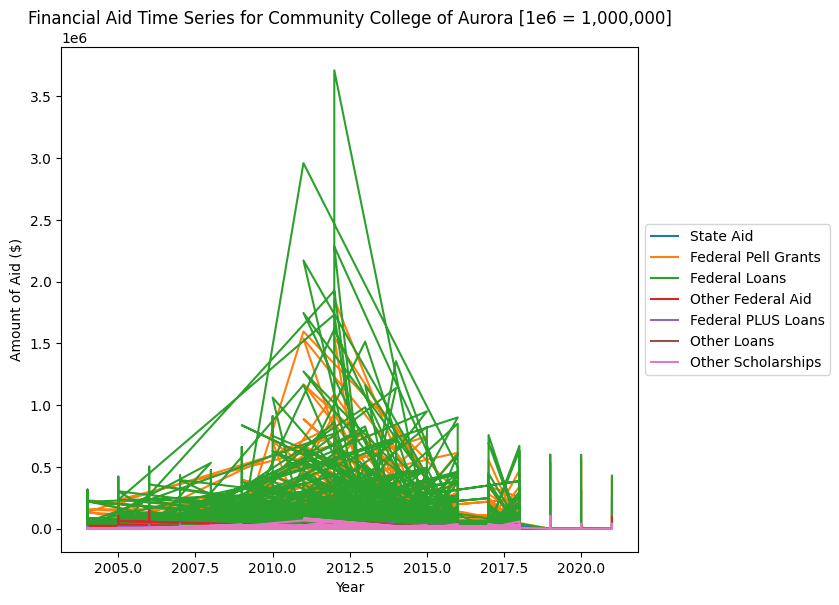

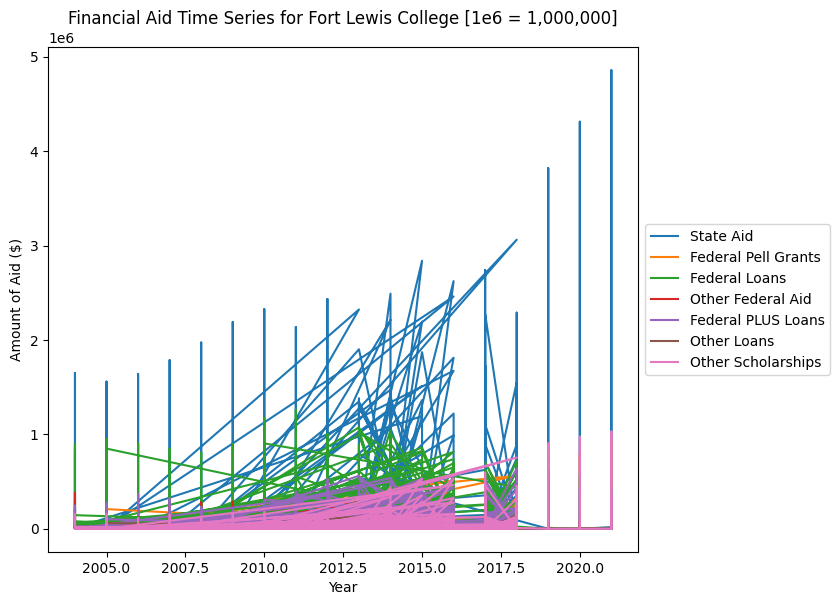

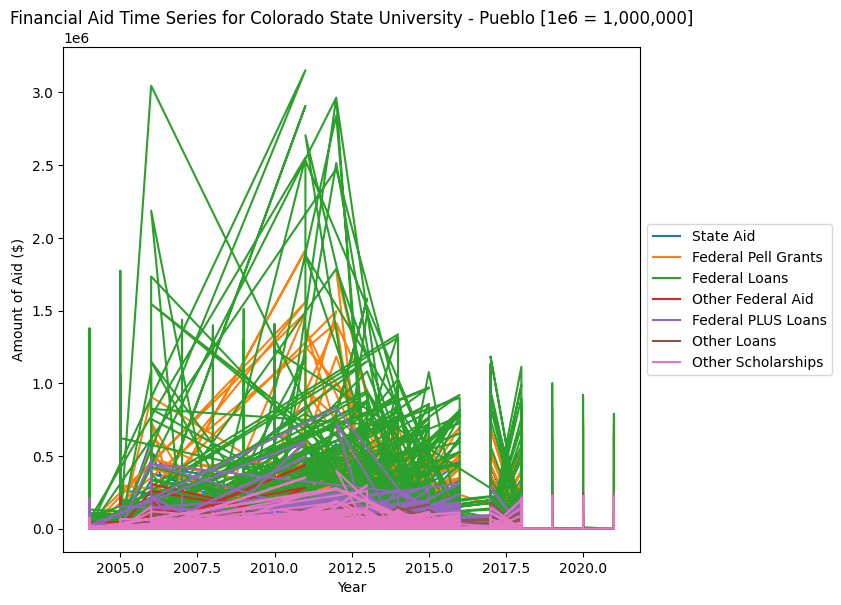

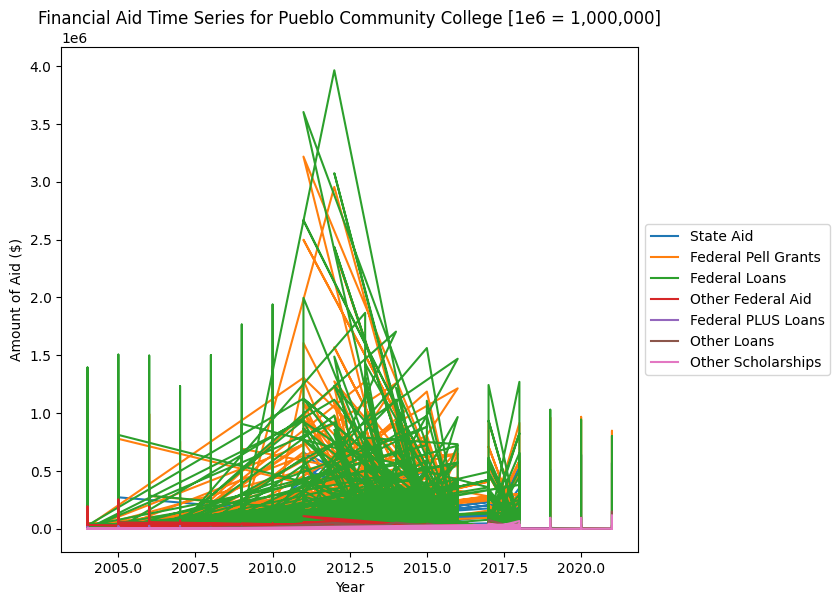

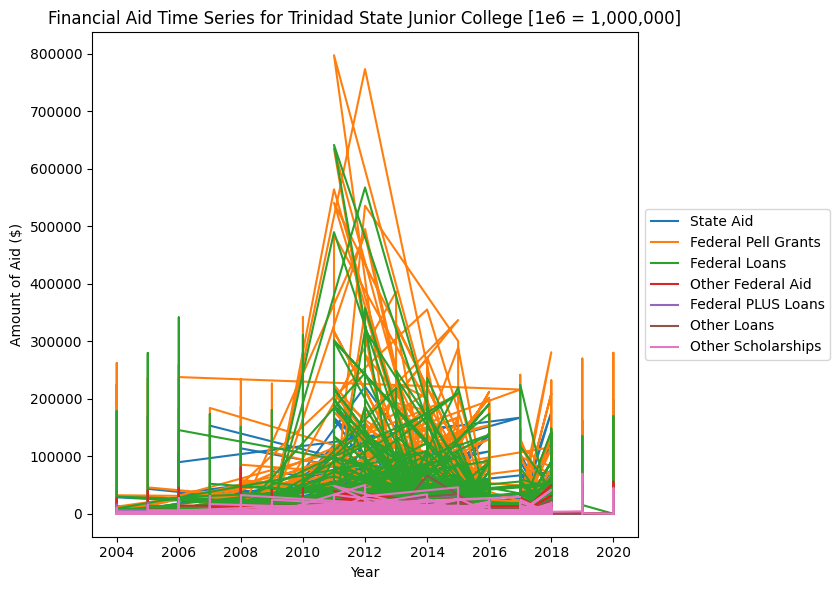

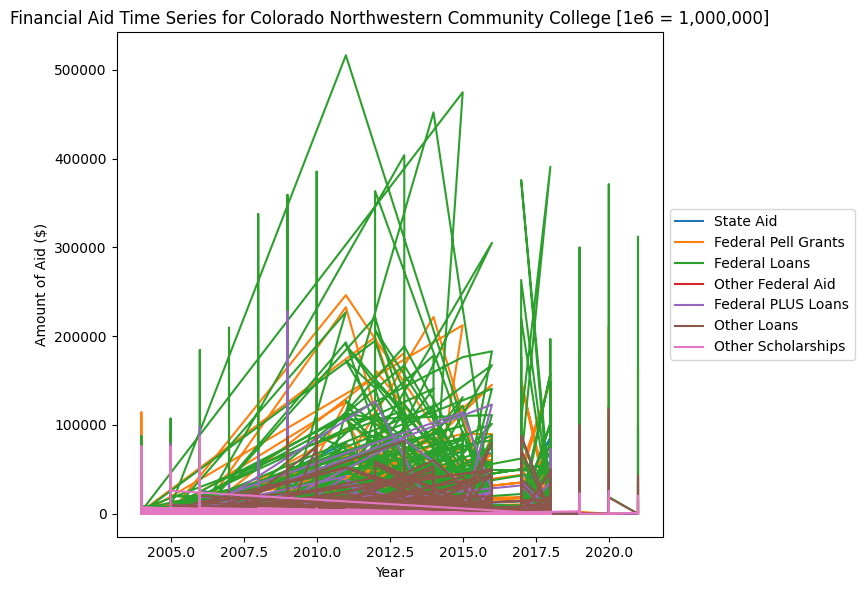

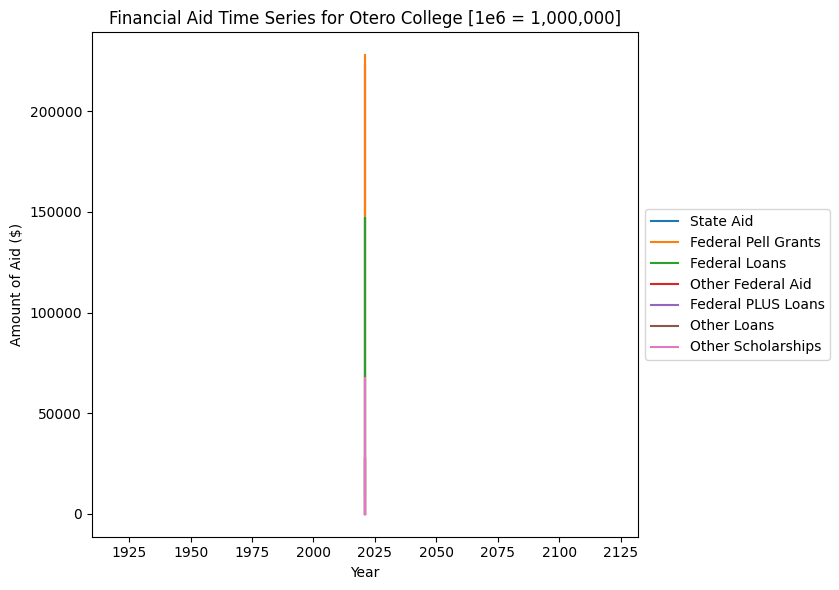

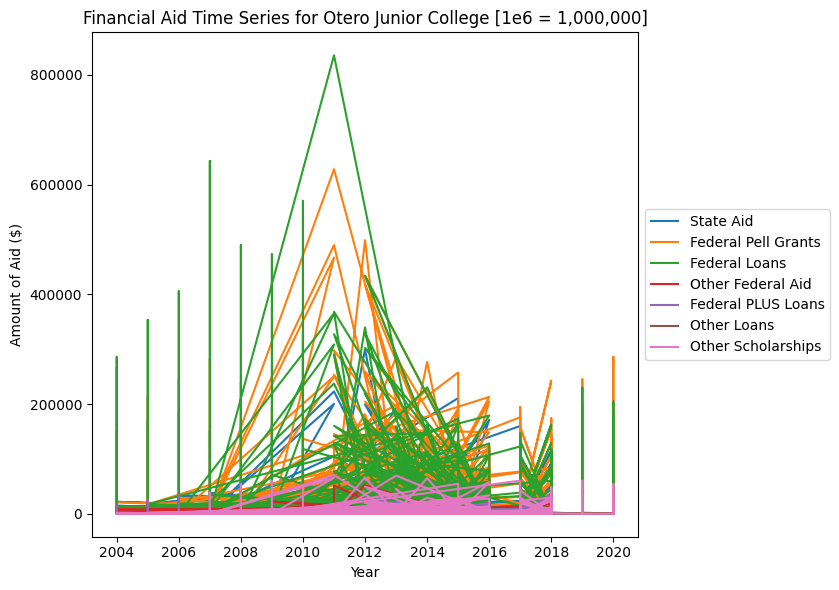

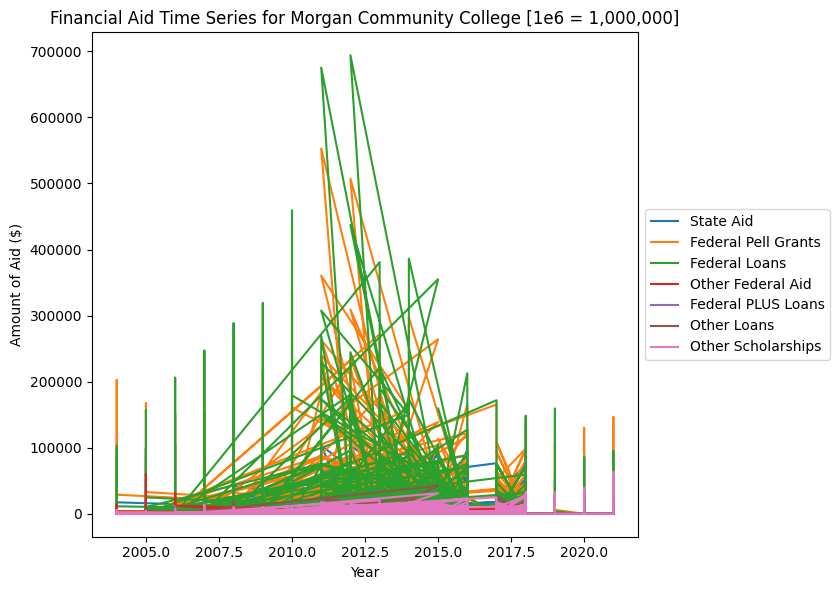

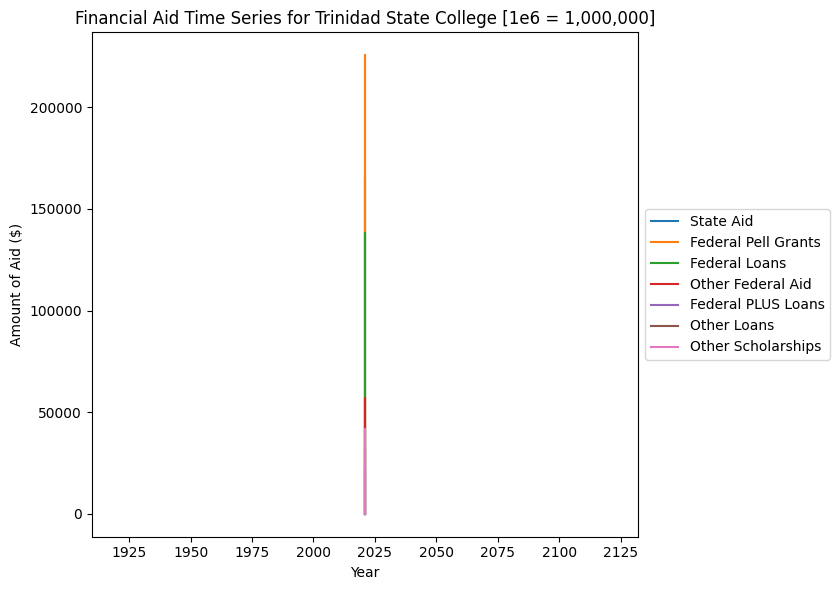

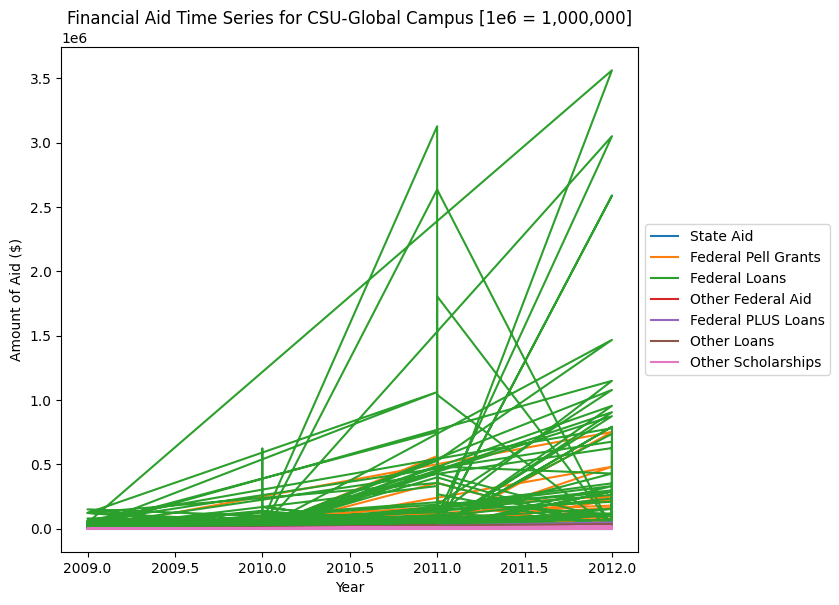

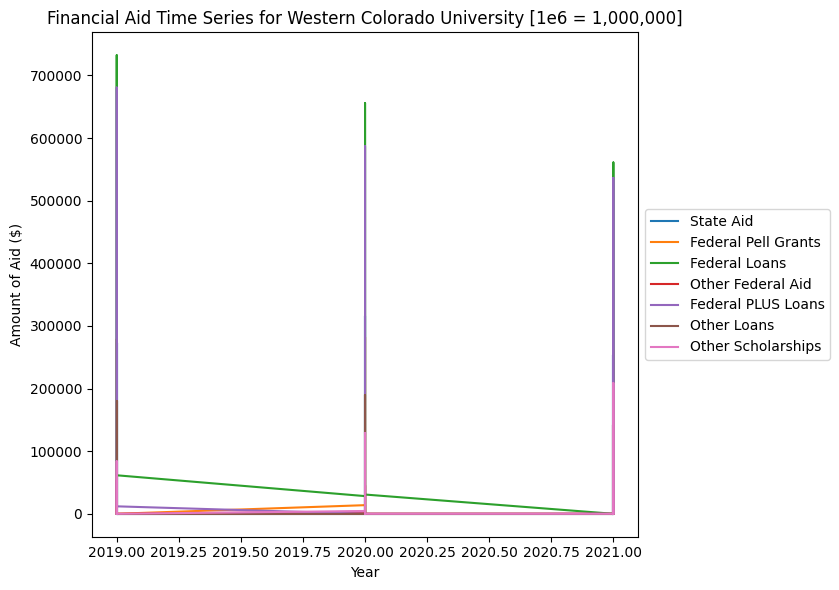

In [26]:
# Step 5: Create a time series graph for each institution
institutions = df_filtered['institutionName'].unique()

for institution in institutions:
    # Filter the data for the specific institution
    institution_data = df_filtered[df_filtered['institutionName'] == institution]
    
    # Plotting financial aid categories over time
    plt.figure(figsize=(10, 6))
    
    plt.plot(institution_data['year'], institution_data['sumStateAid'], label='State Aid')
    plt.plot(institution_data['year'], institution_data['sumFederalPell'], label='Federal Pell Grants')
    plt.plot(institution_data['year'], institution_data['sumFederalLoans'], label='Federal Loans')
    plt.plot(institution_data['year'], institution_data['sumOtherFederal'], label='Other Federal Aid')
    plt.plot(institution_data['year'], institution_data['sumFederalPLUS'], label='Federal PLUS Loans')
    plt.plot(institution_data['year'], institution_data['sumOtherLoans'], label='Other Loans')
    plt.plot(institution_data['year'], institution_data['sumOtherScholarships'], label='Other Scholarships')
    
    # Set title and labels
    plt.title(f"Financial Aid Time Series for {institution} [1e6 = 1,000,000]")
    plt.xlabel('Year')
    plt.ylabel('Amount of Aid ($)')
    
    # Adjust the legend to be outside the plot area (to the right)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    
    # Adjust the layout so the legend doesn't overlap with the plot
    plt.tight_layout(rect=[0, 0, 0.85, 1])
    
    # Show the plot
    plt.show()